In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
client = pd.read_csv("data Ops Case 1/Operation Case 1/cliente_tabla.csv")
product = pd.read_csv("data Ops Case 1/Operation Case 1/producto_tabla.csv")
town = pd.read_csv("data Ops Case 1/Operation Case 1/town_state.csv")
train = pd.read_csv("data Ops Case 1/Operation Case 1/train.csv")
test = pd.read_csv("data Ops Case 1/Operation Case 1/test.csv")

In [3]:
print(client.info())
print(product.info())
print(town.info())
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935360 entries, 0 to 935359
Data columns (total 2 columns):
Cliente_ID       935360 non-null int64
NombreCliente    935360 non-null object
dtypes: int64(1), object(1)
memory usage: 14.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2591 entries, 0 to 2590
Data columns (total 2 columns):
Producto_ID       2591 non-null int64
NombreProducto    2591 non-null object
dtypes: int64(1), object(1)
memory usage: 40.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 2 columns):
Agencia_ID    790 non-null int64
Town          790 non-null object
dtypes: int64(1), object(1)
memory usage: 12.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14602 entries, 0 to 14601
Data columns (total 11 columns):
semana               14602 non-null int64
agencia_id           14602 non-null int64
canal_id             14602 non-null int64
ruta_sak             14602 non-null int64
cliente_id  

In [4]:
client[['Cliente_ID']] = client[['Cliente_ID']].apply(lambda x: x.astype('str'))
product[['Producto_ID']] = product[['Producto_ID']].apply(lambda x: x.astype('str'))
town[['Agencia_ID']] = town[['Agencia_ID']].apply(lambda x: x.astype('str'))
train[['cliente_id', 'producto_id', 'agencia_id']] = train[['cliente_id', 'producto_id', 'agencia_id']].apply(lambda x: x.astype('str'))
test[['cliente_id', 'producto_id', 'agencia_id']] = test[['cliente_id', 'producto_id', 'agencia_id']].apply(lambda x: x.astype('str'))

In [5]:
client=client.rename(columns = {'Cliente_ID':'cliente_id'})
town=town.rename(columns = {'Agencia_ID':'agencia_id'})
product=product.rename(columns = {'Producto_ID':'producto_id'})

In [6]:
client['NombreCliente'] = client['NombreCliente'].str.split(' ')
client['NombreCliente'] = client['NombreCliente'].str.join(sep=' ')

In [7]:
product['NombreProducto'] = product['NombreProducto'].str.split(' ')
product['NombreProducto'] = product['NombreProducto'].str.join(sep=' ')

In [8]:
town['Town'] = town['Town'].str.split(' ')
town['Town'] = town['Town'].str.join(sep=' ')

In [9]:
print(client.cliente_id.duplicated().sum())
print(product.producto_id.duplicated().sum())
print(town.agencia_id.duplicated().sum())
print(train.duplicated().sum())
print(test.duplicated().sum())

4861
0
0
0
0


In [10]:
client.drop_duplicates(subset='cliente_id', inplace=True)

In [11]:
data_train = train.merge(client, on=('cliente_id'), how='inner')

In [12]:
data_train = data_train.merge(town, on=('agencia_id'), how='inner')

In [13]:
data_train = data_train.merge(product, on=('producto_id'), how='inner')

In [14]:
data_test = test.merge(client, on=('cliente_id'), how='inner')

In [15]:
data_test = data_test.merge(town, on=('agencia_id'), how='inner')

In [16]:
data_test = data_test.merge(product, on=('producto_id'), how='inner')

In [173]:
data_train.to_csv('bimbo_train_baru.csv')

In [174]:
data_test.to_csv('bimbo_test_baru.csv')

In [17]:
data_train.shape

(14602, 14)

In [18]:
train[train.venta_uni_hoy != train.demanda_uni_equil]

,semana,agencia_id,canal_id,ruta_sak,cliente_id,producto_id,venta_uni_hoy,venta_hoy,dev_uni_proxima,dev_proxima,demanda_uni_equil
492,6,1455,1,1001,146823,43178,6,72.00,NaN,12.00,5
649,8,1455,1,1001,146853,34215,26,390.26,NaN,15.01,25
752,3,1455,1,1001,149206,35571,9,192.51,NaN,106.95,4
955,8,1455,1,1001,2232632,34215,30,450.30,NaN,15.01,29
1042,4,1455,1,1001,4219966,34264,77,1452.22,NaN,75.44,73
1158,6,1455,1,1101,146821,43202,6,50.28,NaN,8.38,5
1179,5,1455,1,1101,146821,43220,10,189.80,NaN,37.96,8
1281,5,1455,1,1101,146836,43118,25,247.75,NaN,9.91,24
1305,5,1455,1,1101,146836,43203,18,137.52,NaN,15.28,16
1311,5,1455,1,1101,146836,43206,31,139.50,NaN,4.50,30


In [19]:
train['unit_price'] = train['venta_hoy'] / train['venta_uni_hoy']

In [20]:
train['dev_uni_proxima'] = train['dev_proxima'] / train['unit_price']

In [21]:
train.head()

,semana,agencia_id,canal_id,ruta_sak,cliente_id,producto_id,venta_uni_hoy,venta_hoy,dev_uni_proxima,dev_proxima,demanda_uni_equil,unit_price
0,4,1379,2,7017,26988,30236,24,748.8,0.0,0.0,24,31.2
1,5,1379,2,7017,26988,30236,24,748.8,0.0,0.0,24,31.2
2,7,1379,2,7017,26988,30236,48,1497.6,0.0,0.0,48,31.2
3,6,1379,2,7017,26988,30236,24,748.8,0.0,0.0,24,31.2
4,8,1379,2,7017,26988,30236,24,748.8,0.0,0.0,24,31.2


In [22]:
train['stok'] = train['venta_uni_hoy'] + train['dev_uni_proxima']

In [23]:
test['unit_price'] = test['venta_hoy'] / test['venta_uni_hoy']

In [24]:
test['dev_uni_proxima'] = test['dev_proxima'] / test['unit_price']

In [25]:
test[test.venta_uni_hoy != test.demanda_uni_equil]

,semana,agencia_id,canal_id,ruta_sak,cliente_id,producto_id,venta_uni_hoy,venta_hoy,dev_uni_proxima,dev_proxima,demanda_uni_equil,unit_price
123,9,1455,1,1001,149206,34264,2,37.72,18.0,339.48,0,18.86
172,9,1455,1,1001,4219966,34264,13,245.18,77.0,1452.22,0,18.86
223,9,1455,1,1101,146844,43201,4,39.32,2.0,19.66,2,9.83
315,9,1455,1,1101,4219966,43203,10,76.40,1.0,7.64,9,7.64
393,9,1455,1,1201,2226751,43206,5,22.50,12.0,54.00,0,4.50
414,9,1455,1,1201,2233960,34213,44,877.36,2.0,39.88,42,19.94
1122,9,1380,2,1605,1685295,33680,32,760.96,1.0,23.78,31,23.78
1124,9,1380,2,1605,1685295,34211,97,1749.88,1.0,18.04,96,18.04
1128,9,1380,2,1605,1685295,34785,83,1565.38,6.0,113.16,77,18.86
1129,9,1380,2,1605,1685295,34786,293,6727.28,1.0,22.96,292,22.96


In [26]:
test['stok'] = test['venta_uni_hoy'] + test['dev_uni_proxima']

In [27]:
test.head()

,semana,agencia_id,canal_id,ruta_sak,cliente_id,producto_id,venta_uni_hoy,venta_hoy,dev_uni_proxima,dev_proxima,demanda_uni_equil,unit_price,stok
0,9,1379,2,7017,26988,30236,48,1497.60,0.0,0.0,48,31.20,48.0
1,9,1379,2,7019,1871244,30235,24,748.80,0.0,0.0,24,31.20,24.0
2,9,1379,2,7301,19480,31187,189,3112.83,0.0,0.0,189,16.47,189.0
3,9,1379,2,7301,19480,31198,84,1189.44,0.0,0.0,84,14.16,84.0
4,9,1379,2,7308,674685,31200,72,2315.52,0.0,0.0,72,32.16,72.0


In [28]:
data_train.shape

(14602, 14)

In [29]:
train.shape

(14602, 13)

In [30]:
test.shape

(2434, 13)

In [31]:
data_test.shape

(2434, 14)

In [32]:
data_train['ratio'] = data_train['venta_hoy'] - data_train['dev_proxima']

## Visualisasi

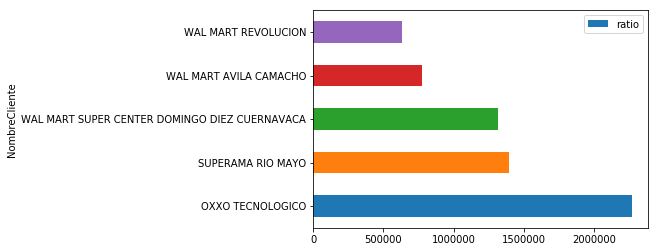

In [33]:
y  = pd.DataFrame(data_train.groupby(["cliente_id","NombreCliente"])["ratio"].sum())
y1 = y.sort_values(by="ratio",ascending=False).head(5)
y1 = y1.reset_index()
y1.plot.barh(x="NombreCliente", y="ratio")

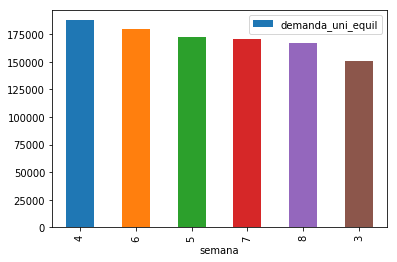

In [41]:
#SEMANA
# sns.countplot(x=train['agencia_id'],data=train, palette='magma')
semana = pd.DataFrame(data_train.groupby("semana")["demanda_uni_equil"].sum()).reset_index()
semana_sort = semana.sort_values(by="demanda_uni_equil",ascending=False) 
semana_sort.plot.bar(x="semana", y="demanda_uni_equil")

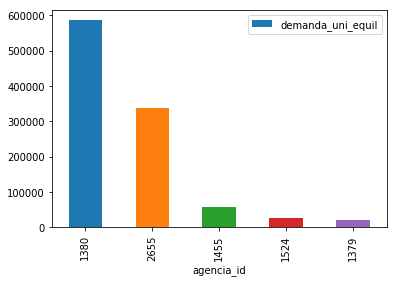

In [40]:
#Agency id
agency = pd.DataFrame(data_train.groupby("agencia_id")["demanda_uni_equil"].sum()).reset_index()
agency_sort = agency.sort_values(by="demanda_uni_equil",ascending=False) 
agency_sort.plot.bar(x="agencia_id", y="demanda_uni_equil")

([<matplotlib.axis.XTick at 0x1f744beb470>,
 <a list of 4 Text xticklabel objects>)

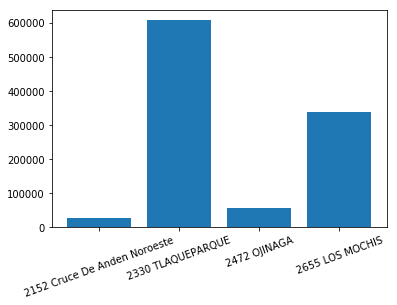

In [37]:
#Agency id
town = pd.DataFrame(data_train.groupby(["Town"])["demanda_uni_equil"].sum()).reset_index()
town_sort = town.sort_values(by="demanda_uni_equil",ascending=False) 
town_sort2 = town.sort_values(by="demanda_uni_equil",ascending=False)
# town_sort.plot.bar(x="Town", y="demanda_uni_equil")
plt.bar(town_sort.index,town_sort["demanda_uni_equil"])
plt.xticks(town_sort.index, town_sort['Town'], fontsize=10, rotation=20)
# town_sort

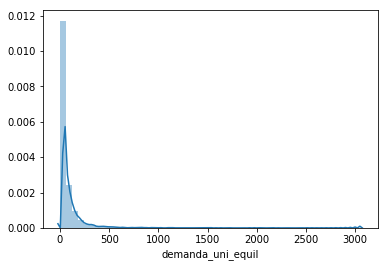

In [39]:
sns.distplot(data_train["demanda_uni_equil"])

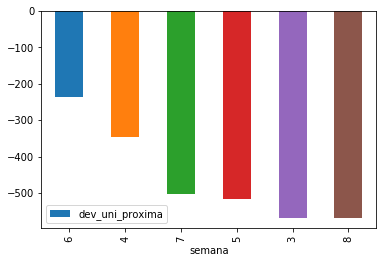

In [44]:
#Dev uni Proxima
data_train['dev_uni_proxima'] = data_train['demanda_uni_equil'] - data_train['venta_uni_hoy']
semana = pd.DataFrame(data_train.groupby("semana")["dev_uni_proxima"].sum()).reset_index()
semana_sort = semana.sort_values(by="dev_uni_proxima",ascending=False) 
semana_sort.plot.bar(x="semana", y="dev_uni_proxima")

In [45]:
pd.crosstab(data_train['semana'],data_train['cliente_id'],margins=True)

cliente_id,101,1064519,1064922,107,1093627,1118106,1120311,1123492,1127032,113855,...,8382138,886620,937467,940579,9600615,9733933,9733973,9838234,9982898,All
semana,,,,,,,,,,,,,,,,,,,,,
3,1,25,21,3,116,2,1,3,15,1,...,1,19,1,1,8,1,41,9,1,2412
4,1,25,28,2,148,2,1,3,15,1,...,1,13,1,1,8,2,41,10,1,2475
5,1,25,31,1,140,1,1,3,15,1,...,1,16,1,1,8,2,41,14,1,2487
6,1,25,21,1,129,1,1,3,15,1,...,2,20,1,1,8,1,41,11,1,2431
7,1,25,23,1,108,1,1,3,15,1,...,1,9,1,1,8,1,41,8,1,2375
8,1,25,29,2,120,1,1,3,15,1,...,1,6,1,1,8,1,41,9,1,2422
All,6,150,153,10,761,8,6,18,90,6,...,7,83,6,6,48,8,246,61,6,14602


In [46]:
semana1 = pd.DataFrame(train.loc[data_train['Town'].isin(['2330 TLAQUEPARQUE'])])
semana2 = pd.DataFrame(train.loc[data_train['Town'].isin(['2655 LOS MOCHIS'])])

In [47]:
semana12 = pd.DataFrame(semana1.groupby(["semana"])["demanda_uni_equil","venta_uni_hoy"].sum()).reset_index()
semana22 = pd.DataFrame(semana2.groupby(["semana"])["demanda_uni_equil","venta_uni_hoy"].sum()).reset_index()

C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


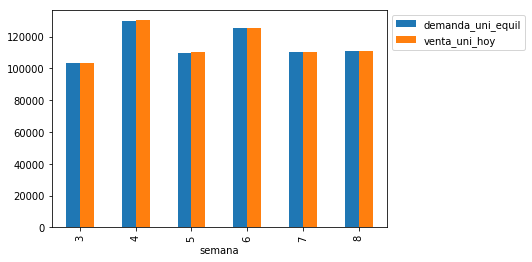

In [48]:
semana12.plot.bar(x="semana", y=["demanda_uni_equil","venta_uni_hoy"])
plt.legend(bbox_to_anchor=(1,1))

C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


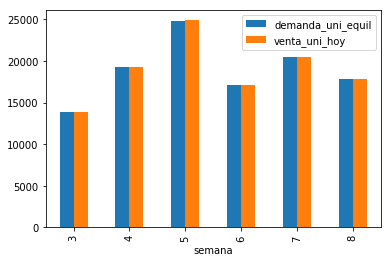

In [49]:
semana22.plot.bar(x="semana", y=["demanda_uni_equil","venta_uni_hoy"])
plt.legend(bbox_to_anchor=(1,1))

In [50]:
y  = pd.DataFrame(data_train.groupby(["cliente_id","NombreCliente"])["venta_uni_hoy"].sum())

In [51]:
y1 = y.sort_values(by="venta_uni_hoy",ascending=False).head(5)

In [52]:
y1 = y1.reset_index()

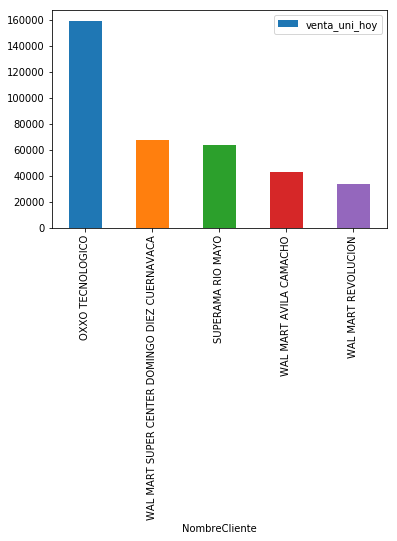

In [53]:
y1.plot.bar(x="NombreCliente", y="venta_uni_hoy")

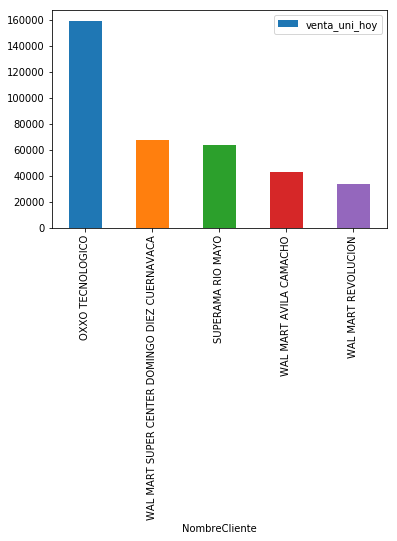

In [54]:
y  = pd.DataFrame(data_train.groupby(["cliente_id","NombreCliente"])["venta_uni_hoy"].sum())
y1 = y.sort_values(by="venta_uni_hoy",ascending=False).head(5)
y1 = y1.reset_index()
y1.plot.bar(x="NombreCliente", y="venta_uni_hoy")

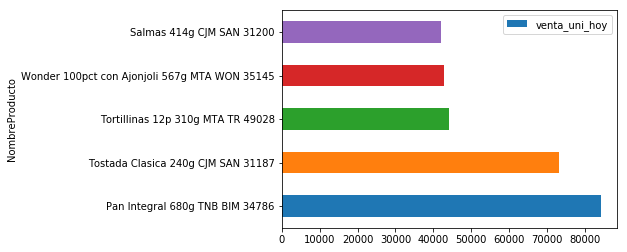

In [55]:
x  = pd.DataFrame(data_train.groupby(["producto_id","NombreProducto"])["venta_uni_hoy"].sum())
x1 = x.sort_values(by="venta_uni_hoy",ascending=False).head(5)
x1 = x1.reset_index()
x1.plot.barh(x="NombreProducto", y="venta_uni_hoy")

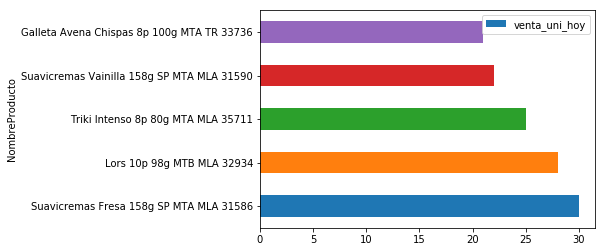

In [57]:
z  = pd.DataFrame(data_train.groupby(["producto_id","NombreProducto"])["venta_uni_hoy"].sum())
z1 = z.sort_values(by="venta_uni_hoy",ascending=False).tail(5)
z1 = z1.reset_index()
z1.plot.barh(x="NombreProducto", y="venta_uni_hoy")

## Modelling

In [66]:
btrain = data_train
btest = data_test

In [67]:
idx = btrain.groupby('Town').sum().sort_values(by='venta_hoy', ascending=False).head(2).index

In [68]:
btraintop2 = btrain[(btrain['Town'].isin(idx))]
btesttop2 = btest[(btest['Town'].isin(idx))]

In [69]:
predict = btraintop2.groupby(['cliente_id','producto_id','ruta_sak']).mean()[['demanda_uni_equil']]
predict.columns = ['mean_all_prior']

In [70]:
predict = predict.reset_index()

In [71]:
predict.head()

,cliente_id,producto_id,ruta_sak,mean_all_prior
0,101,31200,7334,60.000000
1,1064519,30236,1648,48.000000
2,1064519,31763,1648,112.166667
3,1064519,34211,1648,75.000000
4,1064519,34264,1648,53.833333


In [72]:
predict3 = btraintop2[btraintop2['semana'].isin(range(6,9))]
predict3 = predict3.groupby(['cliente_id','producto_id','ruta_sak']).mean()[['demanda_uni_equil']]
predict3.columns = ['3-weeks moving avg']

In [73]:
predict3 = predict3.reset_index()
predict3.head()

,cliente_id,producto_id,ruta_sak,3-weeks moving avg
0,101,31200,7334,56.000000
1,1064519,30236,1648,64.000000
2,1064519,31763,1648,118.333333
3,1064519,34211,1648,73.000000
4,1064519,34264,1648,61.666667


In [76]:
predict2 = btraintop2[btraintop2['semana']==8][['cliente_id','producto_id','ruta_sak','demanda_uni_equil']]
predict2.columns = ['cliente_id','producto_id','ruta_sak','target']

In [77]:
predict2.head()

,cliente_id,producto_id,ruta_sak,target
4,26988,30236,7017,24
10,9733973,30236,1603,48
16,19635,30236,1610,144
22,26945,30236,1617,72
28,591026,30236,1642,72


In [78]:
npredict = pd.merge(predict,predict3, on=['cliente_id','producto_id','ruta_sak'])

In [79]:
npredict.head()

,cliente_id,producto_id,ruta_sak,mean_all_prior,3-weeks moving avg
0,101,31200,7334,60.000000,56.000000
1,1064519,30236,1648,48.000000,64.000000
2,1064519,31763,1648,112.166667,118.333333
3,1064519,34211,1648,75.000000,73.000000
4,1064519,34264,1648,53.833333,61.666667


In [80]:
newpredict = pd.merge(npredict,predict2,on=['cliente_id','producto_id','ruta_sak'])

In [81]:
newpredict.head()

,cliente_id,producto_id,ruta_sak,mean_all_prior,3-weeks moving avg,target
0,101,31200,7334,60.000000,56.000000,96
1,1064519,30236,1648,48.000000,64.000000,96
2,1064519,31763,1648,112.166667,118.333333,140
3,1064519,34211,1648,75.000000,73.000000,69
4,1064519,34264,1648,53.833333,61.666667,57


In [82]:
neopredict = pd.merge(newpredict,btesttop2[['cliente_id','producto_id','ruta_sak','demanda_uni_equil']],
                      on=['cliente_id','producto_id','ruta_sak'],how='left')

In [83]:
neopredict = neopredict[neopredict['demanda_uni_equil'].notnull()]
neopredict.head()

,cliente_id,producto_id,ruta_sak,mean_all_prior,3-weeks moving avg,target,demanda_uni_equil
0,101,31200,7334,60.000000,56.000000,96,120.0
1,1064519,30236,1648,48.000000,64.000000,96,48.0
2,1064519,31763,1648,112.166667,118.333333,140,90.0
3,1064519,34211,1648,75.000000,73.000000,69,68.0
4,1064519,34264,1648,53.833333,61.666667,57,44.0


In [84]:
neopredict = round(neopredict,0).astype(int)

In [85]:
neopredict0 = pd.merge(newpredict,btesttop2[['cliente_id','producto_id','ruta_sak','demanda_uni_equil']],
                      on=['cliente_id','producto_id','ruta_sak'],how='right')
neopredict1 = pd.merge(newpredict,btesttop2[['cliente_id','producto_id','ruta_sak','demanda_uni_equil']],
                      on=['cliente_id','producto_id','ruta_sak'],how='left')

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [87]:
RMSE_MA = np.sqrt(mean_squared_error(neopredict['demanda_uni_equil'], neopredict['3-weeks moving avg']))
RMSE_AP = np.sqrt(mean_squared_error(neopredict['demanda_uni_equil'], neopredict['mean_all_prior']))
RMSE_P = np.sqrt(mean_squared_error(neopredict['demanda_uni_equil'], neopredict['target']))

In [88]:
print(RMSE_MA)
print(RMSE_AP)
print(RMSE_P)

59.26369587869738
54.0682202162937
77.54452391411053
